### DATA COLLECTION AND PREPARATION

***Importing all libraries and their functions***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")



***Read Data***

In [3]:
gd=pd.read_csv('sdss_100k_galaxy_form_burst.csv')
gd


,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1.237650e+18,8.175190e+18,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1.237650e+18,8.175190e+18,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1.237650e+18,8.175190e+18,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1.237650e+18,3.321520e+17,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1.237650e+18,3.321540e+17,198.706863,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237670e+18,3.130040e+18,228.558321,16.759520,20.09288,18.25375,17.28985,16.82903,16.43054,9.177956,...,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,GALAXY,STARFORMING,0.116555,0.000022
99996,1.237670e+18,5.077950e+18,119.601880,10.351615,22.09939,20.82547,19.02462,18.43225,17.96795,1.432706,...,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,GALAXY,STARFORMING,0.366410,0.000093
99997,1.237670e+18,2.834000e+18,235.609200,15.242749,19.31622,18.14944,17.45517,17.04435,16.77127,18.770960,...,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,GALAXY,STARFORMING,0.127064,0.000010
99998,1.237670e+18,2.834000e+18,235.789986,15.189821,19.03856,18.17619,17.53119,17.05532,16.85166,24.241610,...,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,GALAXY,STARFORMING,0.116330,0.000011


***data preparation***

In [4]:
gd.shape

(100000, 43)

In [5]:
gd.columns #columns names of dataset

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z',
       'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i',
       'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g',
       'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i',
       'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err'],
      dtype='object')

In [6]:
gd.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [7]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  float64
 1   specobjid     100000 non-null  float64
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [8]:
gd=gd.drop([ 'objid', 'specobjid', 'ra', 'dec','class'],axis=1 )   #droping the unsed column as it doesnot hellp us in as predtion 

In [9]:
gd['subclass'].replace(['STARFORMING','STARBURST'],[0,1], inplace=True)

In [10]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scl_gd=scaler.fit_transform(gd)
#scl_gd.describe

### EDA (Exloratory Data Analysis)

In [11]:
gd.describe()

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,244.728134,307.474895,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,619.825871,809.166087,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,-54.385510,-144.460200,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,91.777325,104.256550,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,145.664550,180.086150,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,244.944825,307.044675,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000016
max,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,51923.480000,79058.460000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


***visual analysis***

In [12]:
pt=gd['subclass'].value_counts()
pt

subclass
0    74993
1    25007
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

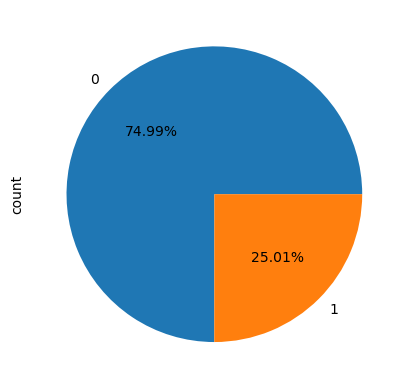

In [13]:
pt.plot(kind="pie",subplots=True, autopct="%1.2f%%")

***checking for the outliers in dataset***

In [ ]:
def fun(col):
    sns.boxplot(x=col,data=gd)
    plt.show()
for i in gd.columns:
    fun(i)
    
#In the belows out cells we can see clearly  that there are OUTLIERS VALUES in each columns data.

***bivariate Analysis***

<Axes: xlabel='subclass', ylabel='i'>

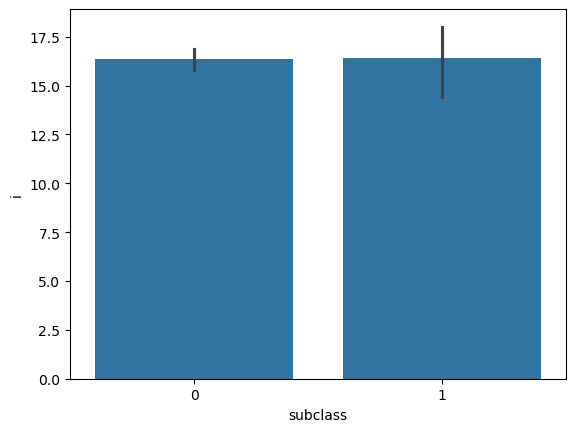

In [15]:
sns.barplot(x='subclass', y='i', data=gd)

In [16]:
gd['subclass'] = gd['subclass'].astype('category')

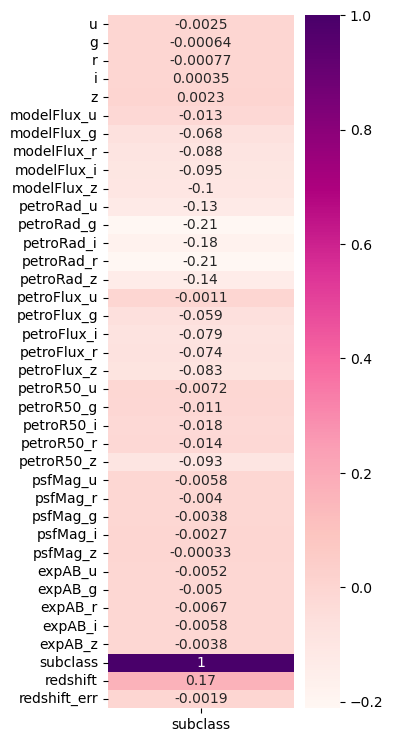

In [17]:
plt.figure(figsize = (3,9))
sns.heatmap(gd.corr()[['subclass']], annot = True, cmap = 'RdPu')
plt.show()   # take whos value is greter

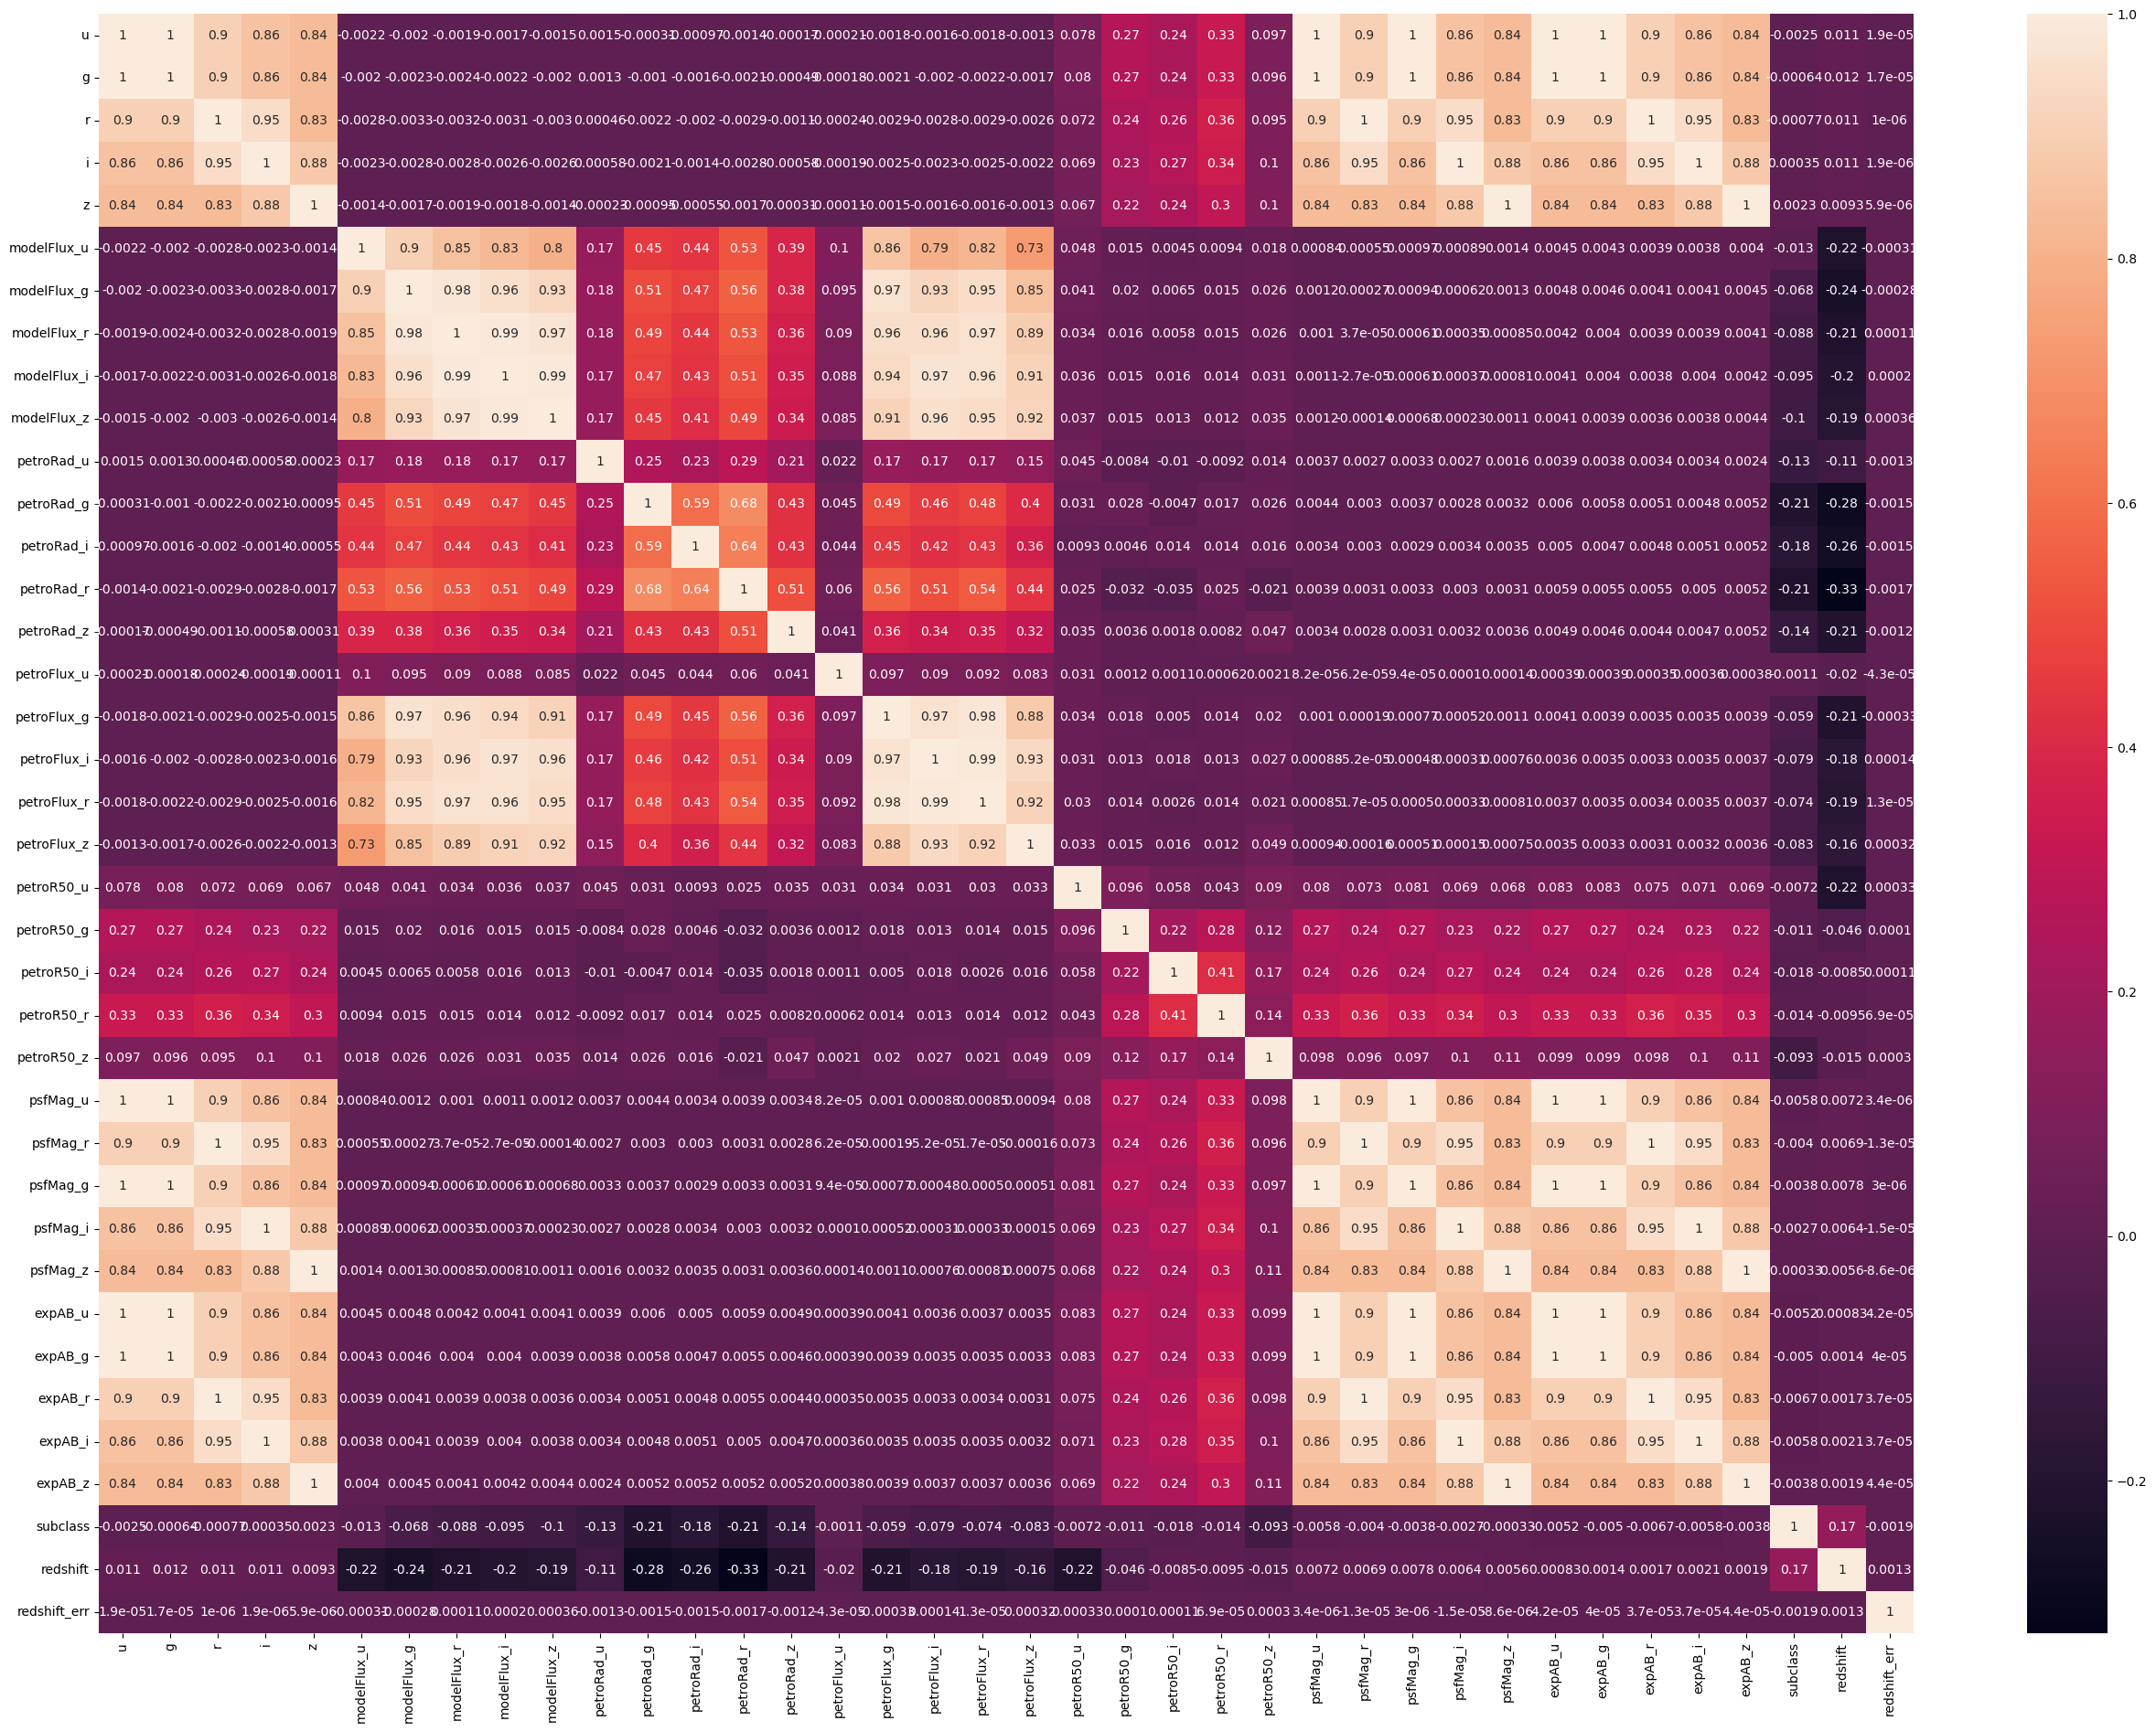

In [18]:
plt.figure(figsize=(32,23))
sns.heatmap(gd.corr(),annot=True)
plt.show()           

***Handling The Outliers***

In [19]:
from scipy.stats import zscore

features = gd.drop('subclass', axis=1)
target = gd['subclass']

# Calculate Z-scores for the features
z_scores = features.apply(zscore)


threshold = 3
outliers = (z_scores.abs() > threshold)


capped_gd = features.copy()
for column in features.columns:
    # Cap the outliers in both directions
    capped_gd[column] = np.where(z_scores[column] > threshold, threshold,
                                 np.where(z_scores[column] < -threshold, -threshold,
                                          features[column]))

# Combine capped features and target back into a DataFrame
capped_gd = pd.concat([capped_gd, target], axis=1)

print("Original DataFrame size:", gd.shape)



Original DataFrame size: (100000, 38)


***Creating box  plot of each column  before and after the handling outliers***

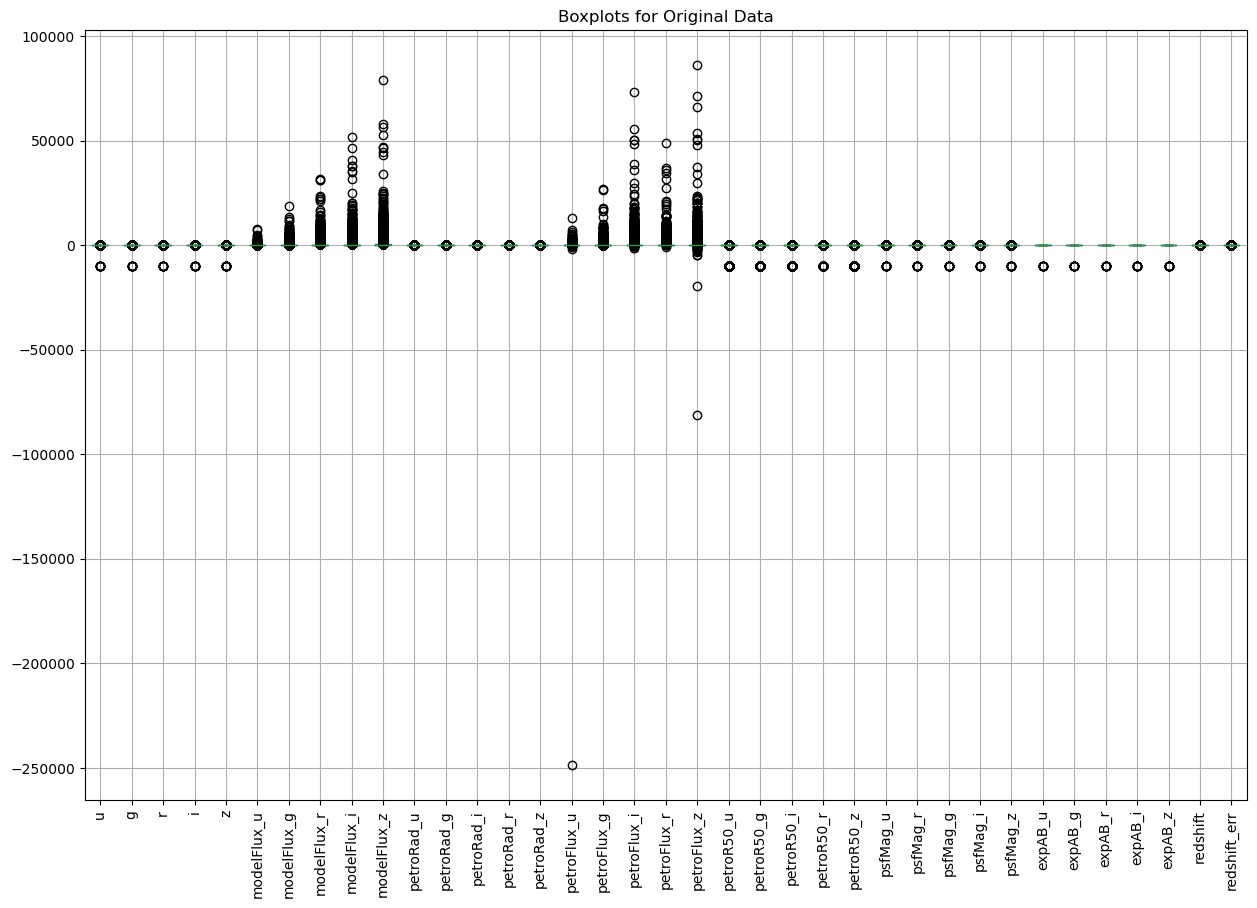

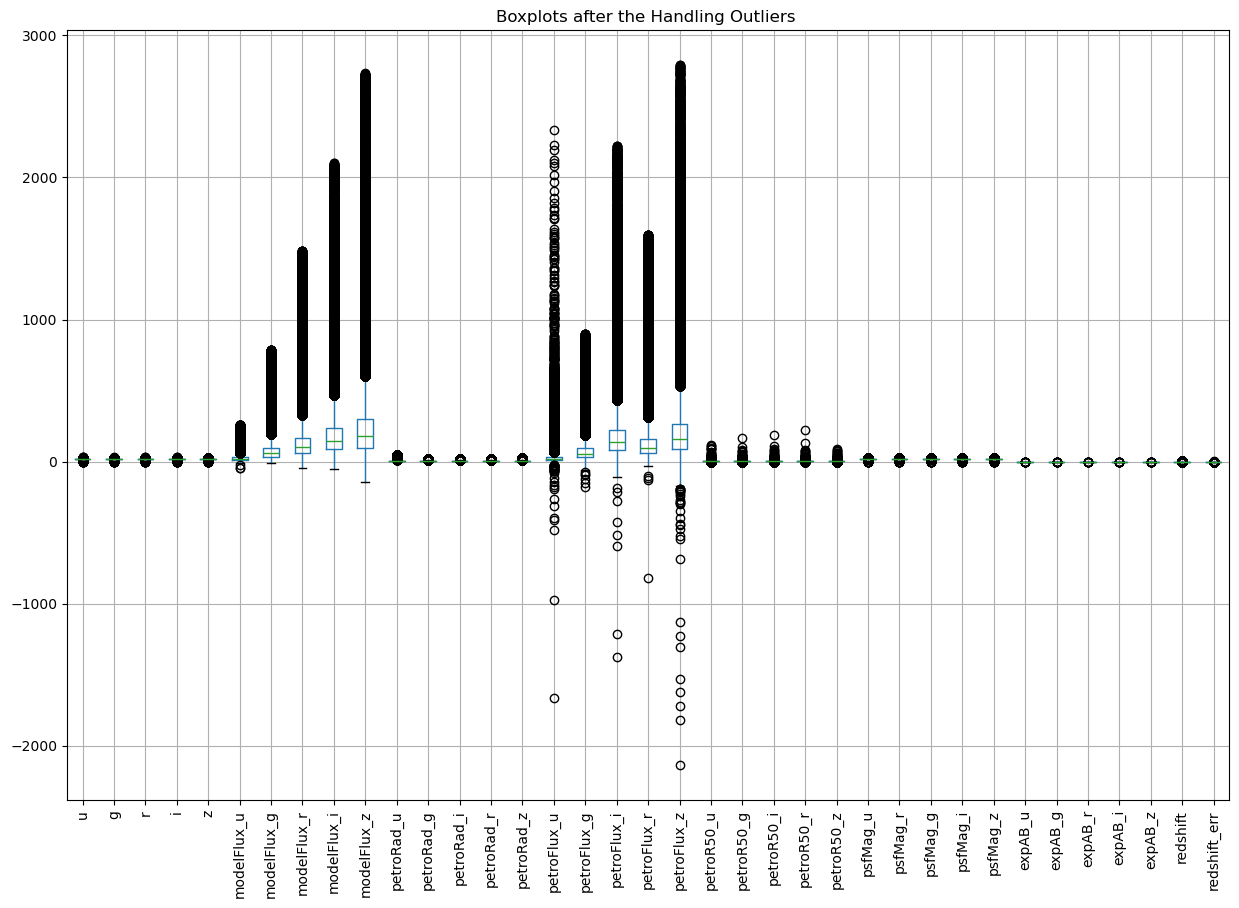

In [20]:
# Function to create boxplots for each column
def create_boxplots(gd, title):
    plt.figure(figsize=(15, 10))
    gd.boxplot()
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

# Boxplots for original data
create_boxplots(features, "Boxplots for Original Data")

# Boxplots for capped data
create_boxplots(capped_gd.drop('subclass', axis=1), "Boxplots after the Handling Outliers ")


***heatmap for correlation btw subclass and other columns***

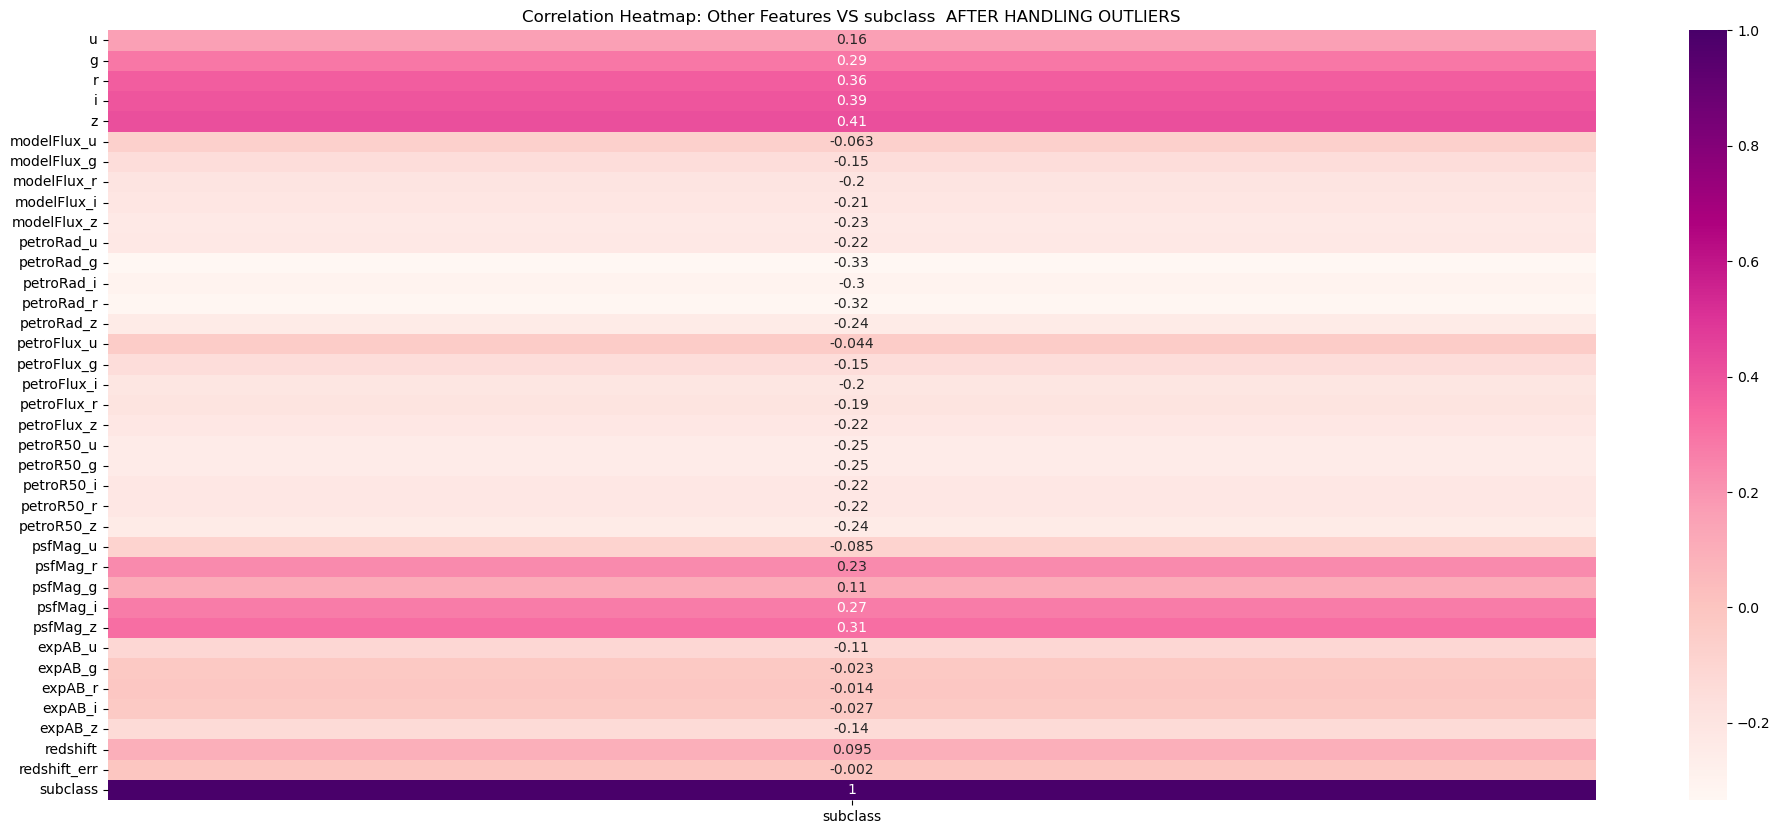

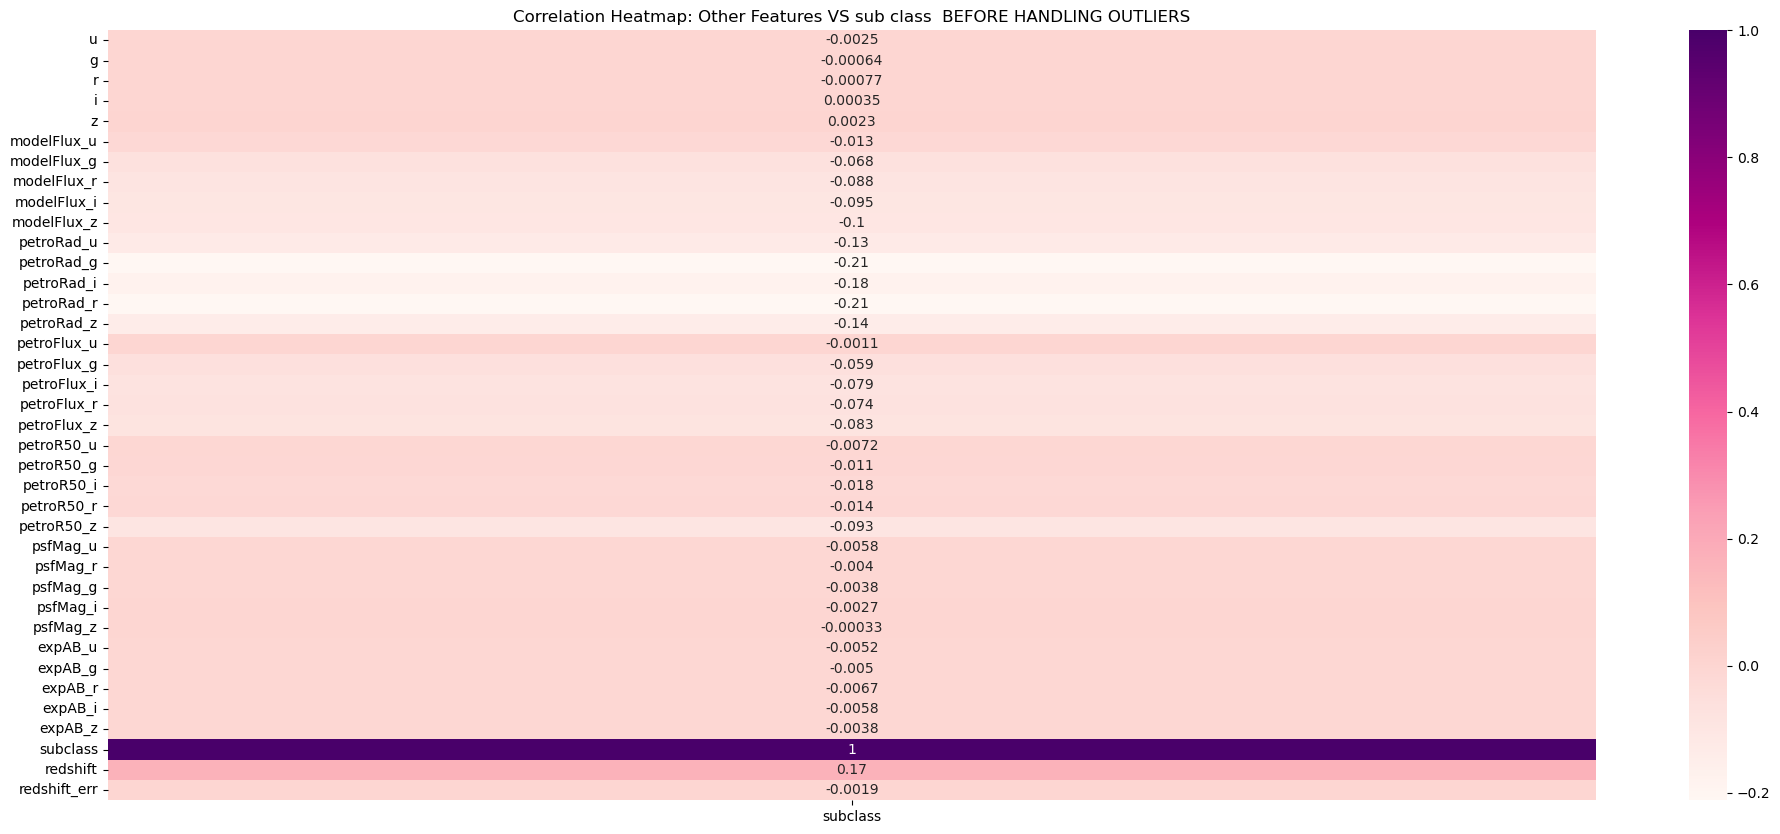

In [21]:


                        
plt.figure(figsize = (24,10))
sns.heatmap(capped_gd.corr()[['subclass']], annot = True, cmap = 'RdPu')
plt.title('Correlation Heatmap: Other Features VS subclass  AFTER HANDLING OUTLIERS')
plt.show()




plt.figure(figsize = (24,10))
sns.heatmap(gd.corr()[['subclass']], annot = True, cmap = 'RdPu')
plt.title('Correlation Heatmap: Other Features VS sub class  BEFORE HANDLING OUTLIERS')
plt.show()  

In [24]:
gd

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
0,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,0,0.067749,0.000015
1,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,0,0.105118,0.000010
2,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,0,0.234089,0.000030
3,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,0,0.110825,0.000030
4,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,0,0.136658,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20.09288,18.25375,17.28985,16.82903,16.43054,9.177956,49.945560,121.35520,185.51900,267.78230,...,18.36605,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,0,0.116555,0.000022
99996,22.09939,20.82547,19.02462,18.43225,17.96795,1.432706,4.673576,24.55518,42.37332,64.97742,...,19.84113,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,0,0.366410,0.000093
99997,19.31622,18.14944,17.45517,17.04435,16.77127,18.770960,54.982040,104.21510,152.14590,195.65200,...,19.11502,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,0,0.127064,0.000010
99998,19.03856,18.17619,17.53119,17.05532,16.85166,24.241610,53.644460,97.16785,150.61570,181.68840,...,18.01613,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,0,0.116330,0.000011


***New Dataset after handling outlier stores in gd_new variable***

In [22]:
gd_new=capped_gd
gd_new

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,subclass
0,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,0.067749,0.000015,0
1,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,0.105118,0.000010,0
2,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,0.234089,0.000030,0
3,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,0.110825,0.000030,0
4,-3.00000,-3.00000,18.37762,18.13383,17.78497,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-3.000000,-3.000000,0.050000,0.050000,0.149973,0.136658,0.000021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20.09288,18.25375,17.28985,16.82903,16.43054,9.177956,49.945560,121.35520,185.51900,267.78230,...,18.36605,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,0.116555,0.000022,0
99996,22.09939,20.82547,19.02462,18.43225,17.96795,1.432706,4.673576,24.55518,42.37332,64.97742,...,19.84113,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,0.366410,0.000093,0
99997,19.31622,18.14944,17.45517,17.04435,16.77127,18.770960,54.982040,104.21510,152.14590,195.65200,...,19.11502,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,0.127064,0.000010,0
99998,19.03856,18.17619,17.53119,17.05532,16.85166,24.241610,53.644460,97.16785,150.61570,181.68840,...,18.01613,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,0.116330,0.000011,0


***Selecting  Best K features from the 38 columns for better prediction***

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define your features and target
x = gd_new.drop(['subclass'], axis=1)
y = gd_new['subclass']

# Initialize the SelectKBest with the desired number of top features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector to the data
x_selected = selector.fit_transform(x, y)

# Get the names of the selected features
selected_features = x.columns[selector.get_support()]

print("The selected features are:", selected_features)


The selected features are: Index(['g', 'r', 'i', 'z', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroR50_g', 'psfMag_i', 'psfMag_z'],
      dtype='object')
